In [4]:
import numpy as np
import pandas as pd
import math as math
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import interp1d

## Task 1.9(1) ##

In [5]:
def calc_exp(arg):
    sum = 1.
    term = 1.
    iter = 1
    while True:
        term = term * arg / iter
        if(sum + term == sum):
            break
        sum = sum + term
        iter += 1
    return sum

In [6]:
args = [0, 1,5,10,15,20,25, -1, -5, -10, -15, -20, -25]
for i in args:
    print('(', i, ",", calc_exp(i), ")")

( 0 , 1.0 )
( 1 , 2.7182818284590455 )
( 5 , 148.41315910257654 )
( 10 , 22026.46579480671 )
( 15 , 3269017.3724721116 )
( 20 , 485165195.4097902 )
( 25 , 72004899337.38586 )
( -1 , 0.36787944117144245 )
( -5 , 0.006737946999084035 )
( -10 , 4.539992962303128e-05 )
( -15 , 3.0590941973020066e-07 )
( -20 , 5.621884472130418e-09 )
( -25 , -7.129780403672078e-07 )


## Task 2.10(2) ##

In [7]:
def calc_next_Zeidel_element(i, A, b, x):
    n = len(A)
    iteration_sum = sum(A[i, j] * x[j] for j in range(n) if j != i)
    x_next_elem = 1 / A[i][i] * (b[i] - iteration_sum)
    return x_next_elem

def calc_next_Jacobi_element(i, A, b, x):
    n = len(A)
    iteration_sum = sum(A[i, j] * x[j] for j in range(n) if j != i)
    x_next_elem = 1 / A[i][i] * (b[i] - iteration_sum)
    return x_next_elem

def iteration_method(A, b, method):
    n = len(A)
    x = np.zeros(n)
    count = 0
    for i in range(5):
        x_old = x.copy()
        count += 1
        for i in range(n):
            if (method == "Jacobi"):
                x[i] = calc_next_Jacobi_element(i, A, b, x_old)
            elif (method == "Zeidel"):
                x[i] = calc_next_Zeidel_element(i, A, b, x)
        # if np.linalg.norm(x - x_old) < eps:
        #     break

    return x

In [9]:
A = np.array([np.array([10, 2, -1]),
     np.array([1, -5, 1]),
     np.array([3, -1, 2])])
b = [10, 10, -5]

print("res Zeidel: ", iteration_method(A, b, "Zeidel"))
print("res Jacobi: ", iteration_method(A, b, "Jacobi"))


print ("res Numpy: ", np.linalg.solve(A, b))

print("res dif Zeidel: ", np.max(np.abs(iteration_method(A, b, "Zeidel")- np.linalg.solve(A, b))))
print("res dif Jacobi: ", np.max(np.abs(iteration_method(A, b, "Jacobi")- np.linalg.solve(A, b))))

res Zeidel:  [ 1.03090656 -2.88867693 -5.4906983 ]
res Jacobi:  [ 1.0441  -2.8617  -5.46625]
res Numpy:  [ 1.02941176 -2.89215686 -5.49019608]
res dif Zeidel:  0.003479934745098223
res dif Jacobi:  0.030456862745098068


## Task 3.5 ##

In [6]:
def calc_mnk_mx(data, pow):
    mx = []
    for i in range (pow + 1):
        row = []
        for j in range (i, i + pow + 1):
            sum = 0
            for k in range (len(data[0])):
                sum += data[0][k]**j
            row.append(sum)
        mx.append(row)
    return mx


def calc_b_col(data, pow):
    res = []
    for i in range(pow + 1):
        sum = 0
        for j in range((len(data[0]))):
            sum += data[1][j] * data[0][j]**i
            # print(sum)
        res.append(sum)
    return res

def find_coef_mnk(data, pow):
    print ("b: ", calc_b_col(data, pow))
    print ("A: ", calc_mnk_mx(data, pow))
    return np.linalg.solve(A, b)[::-1]

In [7]:
def plot_res(data, coef):
    plot_1 = plt.figure(figsize=(12*0.9,10*0.9))
    plt.grid(visible=True, linewidth=0.6)

    plt.xlim(xmin=-4, xmax=4 )
    plt.ylim(ymin=-15, ymax=15 )
    plt.tick_params(axis='both', which='major', labelsize=16, size=10)
    plt.grid(visible=True, linewidth=0.6)

    plt.errorbar(
        data[0], data[1],
        fmt='D',
        linewidth=1,
        markersize=5,
        elinewidth=1,
        color='red',
        label = '',
        capsize=4
    )

    z = np.polyfit(data[0], data[1], deg=2)
    polynom_1 = np.poly1d(coef)
    print(polynom_1)
    x = np.linspace(-4, 4, 1000)
    plt.plot(x, polynom_1(x),"k--", linewidth=1, label = '$y = A_1x^2 + A_2x + c$')

    plt.legend(fontsize=18, markerscale = 2)
    plt.title ('\n Analyzing result'  , size = 19)
    plot_1.savefig('third.png')

b:  [0, 84, 0]
A:  [[7, 0, 28], [0, 28, 0], [28, 0, 196]]
       2
-5.49 x - 2.892 x + 1.029


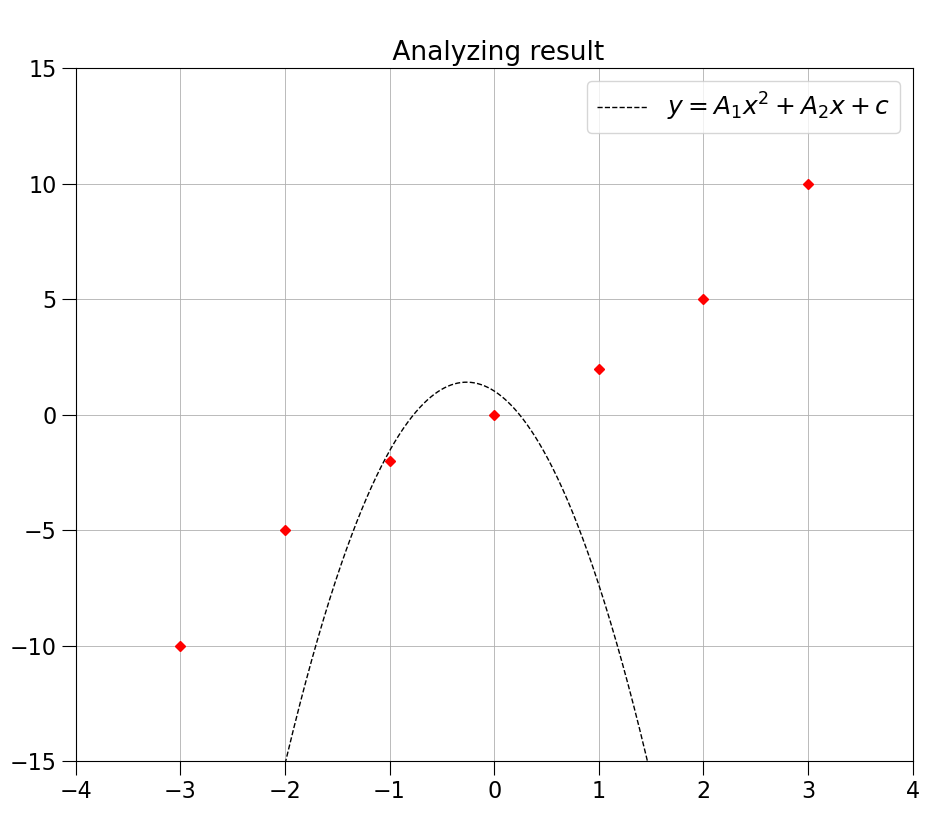

In [8]:
data = [[-3, -2, -1, 0, 1, 2, 3], [-10, -5, -2, 0 , 2, 5 ,10]]

plot_res(data, find_coef_mnk(data, 2))

## Task 5.12 ##

In [12]:
def plot_pol(coef):
    plot_1 = plt.figure(figsize=(12*0.9,10*0.9))
    plt.grid(visible=True, linewidth=0.6)

    plt.xlim(xmin=-10, xmax=10)
    plt.ylim(ymin=-15, ymax=15)
    plt.tick_params(axis='both', which='major', labelsize=16, size=10)
    plt.grid(visible=True, linewidth=0.6)

    polynom_1 = np.poly1d(coef)
    print(polynom_1)
    x = np.linspace(-1000, 1000, 100000)
    plt.plot(x, polynom_1(x),"k--", linewidth=1, label = '$y = f(x)$')

    plt.legend(fontsize=18, markerscale = 2)
    plt.title ('\n Predict'  , size = 19)
    plot_1.savefig('foutth.png')

       5     2
0.001 x + 1 x - 1


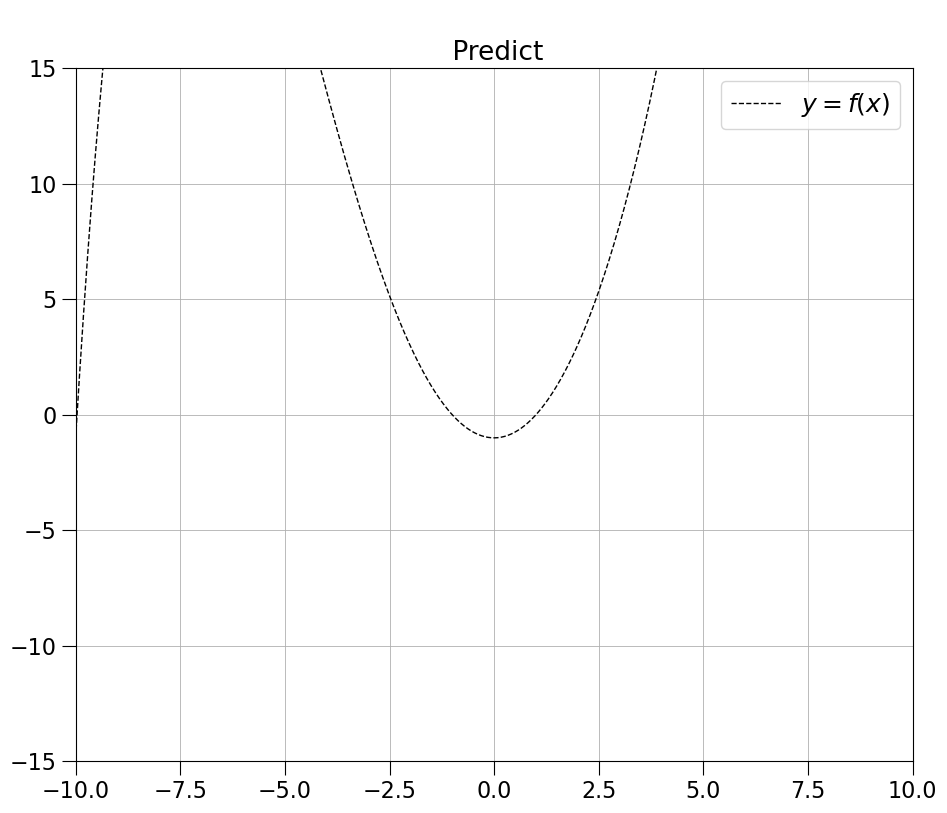

In [13]:
coef = [0.001, 0, 0, 1, 0, -1]
plot_pol(coef)

In [47]:
def split_seg_root(coef, seg, eps):
    pol = np.poly1d(coef)
    while True:
        val = seg[0] + (seg[1] - seg[0]) / 2
        if (np.abs(pol(val)) < np.abs(eps)):
            return val
        elif (pol(seg[1]) * pol(val) > 0):
            seg[1] = val
        else:
            seg[0] = val

In [50]:
print (split_seg_root(coef, [0, 10], 0.1))
print (split_seg_root(coef, [-20, -5], 0.1))
print (split_seg_root(coef, [-5, 0], 0.1))

1.015625
-9.9658203125
-1.015625


In [62]:
def my_diff(pol):
    res = []
    for i in range(len(pol) - 1):
        res.append((len(pol) - 1 - i) * pol[i])
    return res

def newton_root(coef, seg, eps):
    diff = my_diff(coef)
    pol = np.poly1d(coef)
    diff_pol = np.poly1d(diff)

    x = seg[0] + (seg[1] - seg[0]) / 2
    while True:
        if (np.abs(pol(x)) < np.abs(eps)):
            return x
        else:
            x = x - pol(x) / diff_pol(x)


In [64]:
print (newton_root(coef, [0, 10], 0.0000001))
print (newton_root(coef, [-20, -5], 0.0000001))
print (newton_root(coef, [-5, 0], 0.0000001))

0.9995011222379544
-9.966327792619017
-1.000501128514088
